In [1]:
import numpy as np
from neural_network.layer import *
from neural_network.net import *
from queue import Queue
import matplotlib.pyplot as plt
from tqdm import tqdm
from neural_network.trainutils import Dataset, PCADataset, train_test_split
import os
import seaborn as sns

In [2]:
current_dir = os.getcwd()
face_dir = os.path.join(current_dir, "cmu+face+images", "faces")
dataset = PCADataset(face_dir)

In [3]:
dataset.data.shape

(624, 68, 1)

In [4]:
img = dataset.data[0]

In [5]:
dataset.orig_shape

(120, 128)

(68, 1)
(68, 15360)
(120, 128)
(120, 128)


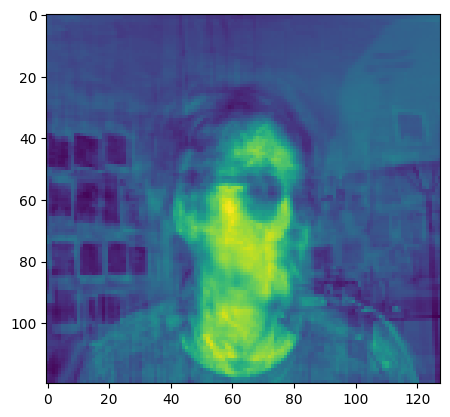

In [6]:
recon = dataset.get_reconstructed_image(0)
print(recon.shape)
plt.imshow(recon)

In [7]:
train, validation, test = train_test_split(dataset, (0.8, 0.0, 0.2))

In [8]:
train.label

array([0, 0, 3, 2, 1, 1, 1, 1, 3, 0, 0, 1, 3, 0, 0, 0, 1, 2, 1, 3, 0, 0,
       1, 1, 0, 1, 3, 3, 3, 2, 0, 1, 0, 3, 0, 3, 1, 0, 1, 0, 2, 3, 1, 2,
       3, 1, 0, 1, 2, 1, 1, 1, 0, 3, 2, 3, 0, 2, 3, 2, 3, 3, 3, 2, 2, 0,
       2, 3, 0, 3, 1, 2, 0, 2, 2, 3, 1, 1, 3, 0, 0, 0, 1, 2, 3, 3, 1, 1,
       1, 1, 2, 3, 3, 2, 2, 2, 0, 2, 1, 0, 3, 2, 2, 3, 0, 1, 3, 1, 0, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 3, 3, 2, 0, 0, 2, 1, 1, 1, 2, 3,
       1, 0, 1, 2, 3, 1, 1, 2, 1, 3, 2, 1, 1, 2, 3, 1, 0, 3, 3, 3, 1, 1,
       3, 2, 2, 2, 0, 0, 0, 2, 2, 3, 0, 3, 1, 2, 0, 1, 3, 0, 0, 0, 3, 1,
       1, 0, 3, 3, 1, 0, 1, 2, 2, 3, 1, 3, 1, 1, 1, 2, 1, 2, 2, 3, 3, 0,
       3, 2, 2, 1, 1, 0, 3, 3, 0, 1, 1, 3, 3, 0, 0, 3, 0, 2, 2, 2, 3, 1,
       1, 2, 2, 0, 3, 1, 1, 2, 2, 2, 2, 3, 3, 1, 0, 0, 3, 0, 2, 3, 2, 0,
       1, 3, 2, 0, 3, 2, 0, 1, 3, 1, 2, 2, 3, 2, 0, 0, 1, 1, 3, 0, 0, 0,
       3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 1, 3, 3, 1, 1, 2, 0, 3, 3, 3, 2, 0,
       0, 2, 2, 0, 3, 2, 0, 1, 1, 0, 1, 2, 0, 3, 0,

In [9]:
input_shape = train[0][0].shape[0]

In [10]:
input_shape

68

In [11]:
linear1 = Linear(input_shape, input_shape//2)
relu1 = ReLU(linear1)
linear2 = Linear(input_shape//2, input_shape//4, relu1)
relu2 = ReLU(linear2)
linear3 = Linear(input_shape//4, input_shape//8, relu2)
relu3 = ReLU(linear3)
linear4 = Linear(input_shape//8, input_shape//16, relu3)
relu4 = ReLU(linear4)
linear5 = Linear(input_shape//16, len(dataset.keys), relu4)
softmaxlayer = Softmax(linear5)
loss_layer = CrossEntropy(softmaxlayer)

model = NeuralNetwork(linear1, softmaxlayer, loss_layer)

In [12]:
print(model.n_layers)
print(model.output_layer)

print("Forward order:")
for layer in model._forward_order:
    print(layer)

print("\nBackward order:")
for layer in model._backward_order:
    print(layer)

11
Forward order:
Linear: (68, 1) -> (34, 1)
ReLU
Linear: (34, 1) -> (17, 1)
ReLU
Linear: (17, 1) -> (8, 1)
ReLU
Linear: (8, 1) -> (4, 1)
ReLU
Linear: (4, 1) -> (4, 1)
Softmax
CrossEntropy

Backward order:
CrossEntropy
Softmax
Linear: (4, 1) -> (4, 1)
ReLU
Linear: (8, 1) -> (4, 1)
ReLU
Linear: (17, 1) -> (8, 1)
ReLU
Linear: (34, 1) -> (17, 1)
ReLU
Linear: (68, 1) -> (34, 1)


In [13]:
loss_array = []
pbar = tqdm(range(2500))
for i in pbar:
    epoch_loss = 0
    for data, label in train:
        data = data.reshape(-1, 1)
        out = model.forward(data)
        #print(out)
        loss = model.loss_layer.forward(out, label)
        epoch_loss += loss
        model.backward()
        model.step()
    epoch_loss = epoch_loss / len(train)
    loss_array.append(epoch_loss)
    pbar.set_description(str(epoch_loss))

[0.00180849]: 100%|██████████| 1000/1000 [00:35<00:00, 28.18it/s]


In [14]:
loss_array

[array([1.49899806]),
 array([1.4252152]),
 array([1.38439279]),
 array([1.34738025]),
 array([1.31194177]),
 array([1.27563424]),
 array([1.23479094]),
 array([1.19174767]),
 array([1.14727426]),
 array([1.10299385]),
 array([1.05989615]),
 array([1.01485869]),
 array([0.96707278]),
 array([0.91557161]),
 array([0.86380156]),
 array([0.81377359]),
 array([0.76211187]),
 array([0.71221748]),
 array([0.66474445]),
 array([0.61934237]),
 array([0.57702812]),
 array([0.53686176]),
 array([0.49854458]),
 array([0.46368323]),
 array([0.43236037]),
 array([0.40356034]),
 array([0.37725782]),
 array([0.35378861]),
 array([0.33251092]),
 array([0.31242827]),
 array([0.29444109]),
 array([0.27860996]),
 array([0.26392587]),
 array([0.25057624]),
 array([0.23888605]),
 array([0.2280831]),
 array([0.21377358]),
 array([0.20138814]),
 array([0.19230495]),
 array([0.18450031]),
 array([0.17719518]),
 array([0.1703567]),
 array([0.16440427]),
 array([0.15865984]),
 array([0.15344883]),
 array([0.148

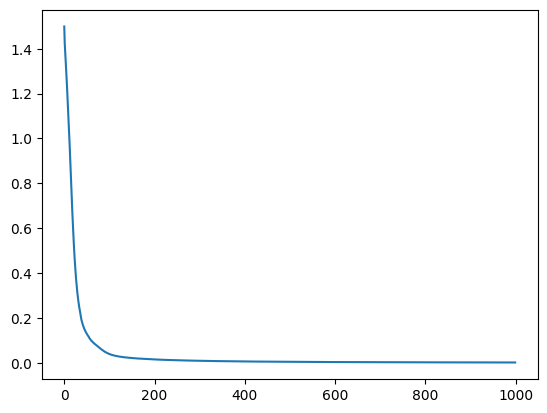

In [15]:
plt.plot(loss_array)

In [16]:
train.label

array([0, 0, 3, 2, 1, 1, 1, 1, 3, 0, 0, 1, 3, 0, 0, 0, 1, 2, 1, 3, 0, 0,
       1, 1, 0, 1, 3, 3, 3, 2, 0, 1, 0, 3, 0, 3, 1, 0, 1, 0, 2, 3, 1, 2,
       3, 1, 0, 1, 2, 1, 1, 1, 0, 3, 2, 3, 0, 2, 3, 2, 3, 3, 3, 2, 2, 0,
       2, 3, 0, 3, 1, 2, 0, 2, 2, 3, 1, 1, 3, 0, 0, 0, 1, 2, 3, 3, 1, 1,
       1, 1, 2, 3, 3, 2, 2, 2, 0, 2, 1, 0, 3, 2, 2, 3, 0, 1, 3, 1, 0, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 3, 3, 2, 0, 0, 2, 1, 1, 1, 2, 3,
       1, 0, 1, 2, 3, 1, 1, 2, 1, 3, 2, 1, 1, 2, 3, 1, 0, 3, 3, 3, 1, 1,
       3, 2, 2, 2, 0, 0, 0, 2, 2, 3, 0, 3, 1, 2, 0, 1, 3, 0, 0, 0, 3, 1,
       1, 0, 3, 3, 1, 0, 1, 2, 2, 3, 1, 3, 1, 1, 1, 2, 1, 2, 2, 3, 3, 0,
       3, 2, 2, 1, 1, 0, 3, 3, 0, 1, 1, 3, 3, 0, 0, 3, 0, 2, 2, 2, 3, 1,
       1, 2, 2, 0, 3, 1, 1, 2, 2, 2, 2, 3, 3, 1, 0, 0, 3, 0, 2, 3, 2, 0,
       1, 3, 2, 0, 3, 2, 0, 1, 3, 1, 2, 2, 3, 2, 0, 0, 1, 1, 3, 0, 0, 0,
       3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 1, 3, 3, 1, 1, 2, 0, 3, 3, 3, 2, 0,
       0, 2, 2, 0, 3, 2, 0, 1, 1, 0, 1, 2, 0, 3, 0,

accuracy: 1.0


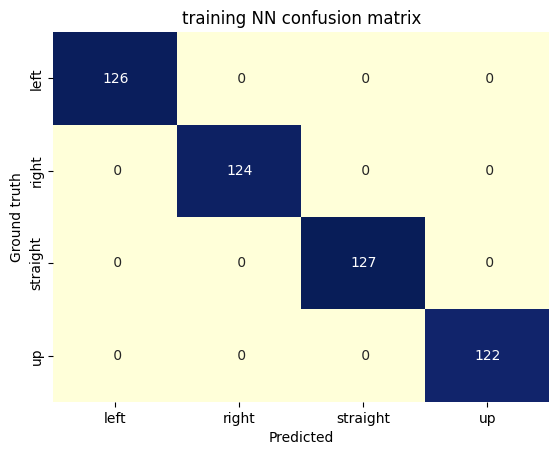

In [17]:
confusion_matrix = np.zeros(shape=[len(dataset.keys)]*2)
for data, label in train:
    data = data.reshape(-1, 1)
    out = model.forward(data)
    #print(out)
    loss = model.loss_layer.forward(out, label)
    confusion_matrix[np.argmax(label), np.argmax(out)] += 1
    epoch_loss += loss
print(f"accuracy: {confusion_matrix.trace()/confusion_matrix.sum()}")

plt.figure()
sns.heatmap(confusion_matrix.astype(int), annot=True, cbar=False, xticklabels=dataset.keys, yticklabels=dataset.keys, cmap="YlGnBu", fmt="2d")
plt.xlabel("Prediction")
plt.ylabel("Ground truth")
#plt.title(f"")
plt.show()

accuracy: 0.888


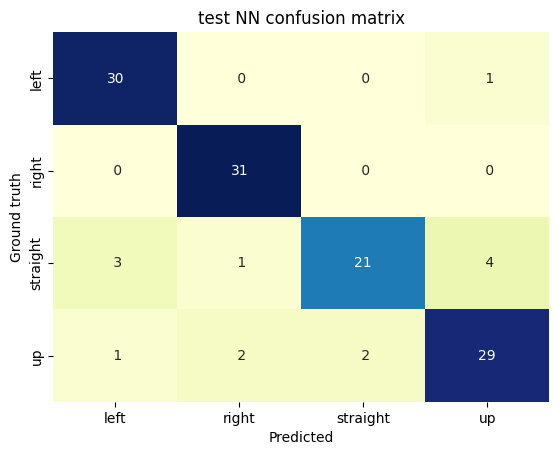

In [18]:
confusion_matrix = np.zeros(shape=[len(dataset.keys)]*2)
for data, label in test:
    data = data.reshape(-1, 1)
    out = model.forward(data)
    #print(out)
    loss = model.loss_layer.forward(out, label)
    confusion_matrix[np.argmax(label), np.argmax(out)] += 1
    epoch_loss += loss
print(f"accuracy: {confusion_matrix.trace()/confusion_matrix.sum()}")

plt.figure()
sns.heatmap(confusion_matrix.astype(int), annot=True, cbar=False, xticklabels=dataset.keys, yticklabels=dataset.keys, cmap="YlGnBu", fmt="2d")
plt.xlabel("Predicted")
plt.ylabel("Ground truth")
plt.title(f"test NN confusion matrix")
plt.show()

In [19]:
train[0][0].shape

(68,)

In [20]:
dataset.eig_idx

68